In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Label File
pd.read_csv('../input/state-farm-distracted-driver-detection/driver_imgs_list.csv')

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg
...,...,...,...
22419,p081,c9,img_56936.jpg
22420,p081,c9,img_46218.jpg
22421,p081,c9,img_25946.jpg
22422,p081,c9,img_67850.jpg


In [3]:
# Loading ImageDataGenrator
from keras.preprocessing.image import ImageDataGenerator

In [4]:
# Making an object of ImageData Genrator
imageGen = ImageDataGenerator(rescale=1.0/255)

In [5]:
# Getting Training Genrator 
train_gen=imageGen.flow_from_directory(
    '../input/state-farm-distracted-driver-detection/imgs/train',
    batch_size=32,
    target_size=(100,100),
    class_mode = 'categorical',
)

Found 22424 images belonging to 10 classes.


# Making our CNN Model

In [6]:
# Making our CNN Model
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.models import Sequential
model = Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape =(100,100,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(1024,activation='relu'),
    Dense(512,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']  )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              34669568  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               5

In [7]:
# Fitting our model
model.fit_generator(train_gen,epochs=10)

Epoch 1/5
701/701 [==============================] - 153s 219ms/step - loss: 0.4212 - accuracy: 0.8597
Epoch 2/5
701/701 [==============================] - 105s 150ms/step - loss: 0.0383 - accuracy: 0.9892
Epoch 3/5
701/701 [==============================] - 104s 148ms/step - loss: 0.0249 - accuracy: 0.9922
Epoch 4/5
701/701 [==============================] - 103s 147ms/step - loss: 0.0149 - accuracy: 0.9955
Epoch 5/5
701/701 [==============================] - 104s 149ms/step - loss: 0.0125 - accuracy: 0.9969


In [8]:
# Making an object of ImageData Genrator
imageGen = ImageDataGenerator(rescale=1.0/255)

# Making Test Folder For ImageDataGenerator

In [9]:
# Making a test directory in output folder ( that can be readable and writeable )
import os
os.mkdir('./test')
os.mkdir('./test/all_classes')

In [10]:
# Importing copyfile so copy the testing images from the input test folder to ouput test folder
from shutil import copyfile

In [11]:
# Copying from the input test folder to ouput test folder
d = pd.read_csv('../input/state-farm-distracted-driver-detection/sample_submission.csv')
for row in d.values:
    file_name = row[0]
    copyfile( '../input/state-farm-distracted-driver-detection/imgs/test/'+file_name , './test/all_classes/'+file_name )

In [12]:
# Getting Testing Genrator 
test_gen=imageGen.flow_from_directory(
    './test',
    class_mode=None,
    shuffle=False,
    target_size=(100,100),
)

Found 79726 images belonging to 1 classes.


In [13]:
# Predicting from test Genrator 
test_gen.reset()
predictions = model.predict_generator(test_gen,verbose=1)

2492/2492 [==============================] - 339s 136ms/step


In [14]:
# Checking the shape of prediction
predictions.shape

(79726, 10)

In [15]:
# Converting the Prediction same as sample submission dataFrame
# Making the dictionary of The Predcition
d1 = pd.read_csv('../input/state-farm-distracted-driver-detection/sample_submission.csv')
d ={
    'img':list(d1.values[:,0]),
}
for i in range(0,10):
    d['c' + str(i)] = list(predictions[:,i])
d

{'img': ['img_1.jpg',
  'img_10.jpg',
  'img_100.jpg',
  'img_1000.jpg',
  'img_100000.jpg',
  'img_100001.jpg',
  'img_100002.jpg',
  'img_100003.jpg',
  'img_100004.jpg',
  'img_100005.jpg',
  'img_100007.jpg',
  'img_100008.jpg',
  'img_100009.jpg',
  'img_10001.jpg',
  'img_100010.jpg',
  'img_100011.jpg',
  'img_100012.jpg',
  'img_100013.jpg',
  'img_100014.jpg',
  'img_100016.jpg',
  'img_100017.jpg',
  'img_100018.jpg',
  'img_100019.jpg',
  'img_10002.jpg',
  'img_100020.jpg',
  'img_100022.jpg',
  'img_100023.jpg',
  'img_100024.jpg',
  'img_100025.jpg',
  'img_100028.jpg',
  'img_100030.jpg',
  'img_100031.jpg',
  'img_100032.jpg',
  'img_100033.jpg',
  'img_100034.jpg',
  'img_100035.jpg',
  'img_100037.jpg',
  'img_100038.jpg',
  'img_100039.jpg',
  'img_10004.jpg',
  'img_100040.jpg',
  'img_100042.jpg',
  'img_100043.jpg',
  'img_100044.jpg',
  'img_100047.jpg',
  'img_100049.jpg',
  'img_10005.jpg',
  'img_100051.jpg',
  'img_100052.jpg',
  'img_100053.jpg',
  'img_1000

In [16]:
# Converting the Prediction to DataFrame
df = pd.DataFrame(d)
df

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_1.jpg,4.072082e-12,3.891194e-15,2.409957e-12,1.574501e-12,1.182511e-11,0.999982,1.004946e-11,3.455387e-10,1.454922e-09,1.814331e-05
1,img_10.jpg,1.769172e-09,2.173360e-09,2.176986e-05,3.404580e-06,1.404716e-08,0.999961,1.345574e-05,3.475764e-08,8.136983e-08,3.068141e-08
2,img_100.jpg,1.458682e-01,1.356844e-02,2.345367e-01,1.496139e-03,7.884914e-05,0.047416,1.503324e-01,8.666313e-03,6.215291e-03,3.918216e-01
3,img_1000.jpg,3.824651e-02,6.614419e-04,1.310149e-03,4.440559e-03,1.746587e-01,0.001961,4.021170e-01,1.339589e-02,3.618637e-01,1.345398e-03
4,img_100000.jpg,1.043444e-05,1.197462e-08,9.227689e-08,5.364599e-06,6.078204e-03,0.012147,1.261737e-04,6.798908e-06,5.700034e-01,4.116223e-01
...,...,...,...,...,...,...,...,...,...,...,...
79721,img_99994.jpg,2.076108e-05,8.650414e-04,4.252056e-03,6.716828e-09,3.673228e-07,0.000336,8.246030e-02,9.115871e-01,4.441551e-04,3.460463e-05
79722,img_99995.jpg,4.792815e-01,5.458010e-04,4.178956e-05,3.935994e-04,4.886035e-02,0.000022,6.228126e-04,1.284117e-03,4.252441e-04,4.685226e-01
79723,img_99996.jpg,2.881949e-04,1.540564e-05,3.516633e-05,8.108621e-08,4.257687e-05,0.000038,1.615853e-02,9.826112e-01,8.480551e-06,8.024084e-04
79724,img_99998.jpg,3.253277e-09,4.678269e-10,4.636529e-05,6.180800e-12,3.600017e-10,0.000003,9.999454e-01,4.945754e-06,7.996514e-10,1.875453e-10


In [17]:
# Converting DataFrame into CSV File
df.to_csv('./Prediction.csv',index=False)

In [18]:
# c0: safe driving
# c1: texting - right
# c2: talking on the phone - right
# c3: texting - left
# c4: talking on the phone - left
# c5: operating the radio
# c6: drinking
# c7: reaching behind
# c8: hair and makeup
# c9: talking to passenger

In [22]:
# Getting Classes from Predictions
predicted_class_indices=np.argmax(predictions,axis=1)
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions_in_class = [labels[k] for k in predicted_class_indices]

In [28]:
filenames=test_gen.filenames
file=[]
for f in filenames:
    file.append(f.split('/')[1])
results=pd.DataFrame({"Filename":file ,
                      "Predictions":predictions_in_class})
results

,Filename,Predictions
0,img_1.jpg,c5
1,img_10.jpg,c5
2,img_100.jpg,c9
3,img_1000.jpg,c6
4,img_100000.jpg,c8
...,...,...
79721,img_99994.jpg,c7
79722,img_99995.jpg,c0
79723,img_99996.jpg,c7
79724,img_99998.jpg,c6


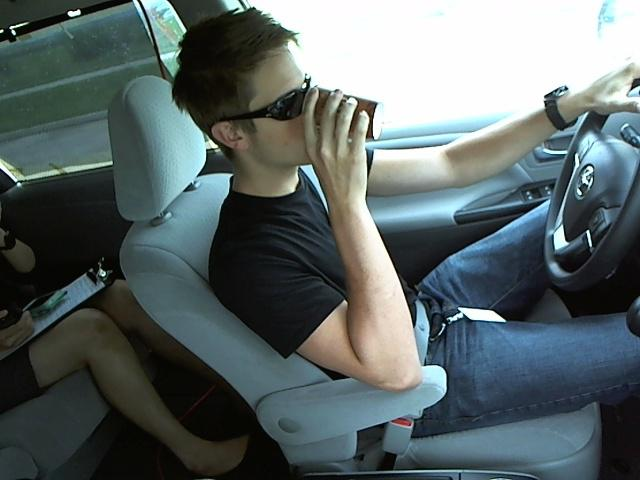

In [35]:
# Random Image of Testing Data
from IPython.display import Image
Image(filename='../input/state-farm-distracted-driver-detection/imgs/test/img_100004.jpg') 

In [37]:
# Predicting the class of Image
results.loc[results['Filename'] == 'img_100004.jpg']
# c6 => drinking

,Filename,Predictions
8,img_100004.jpg,c6


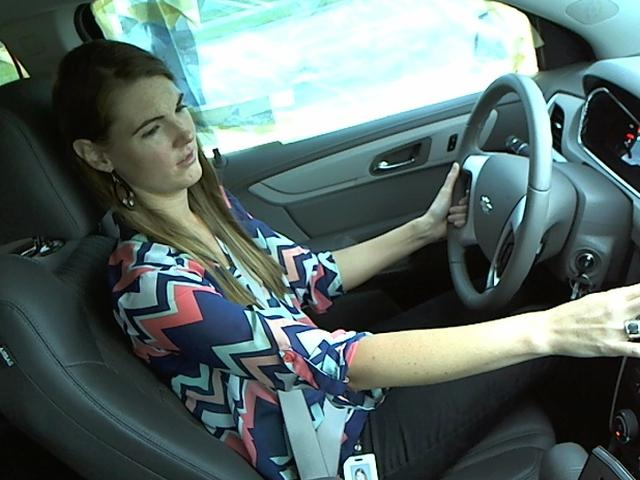

In [45]:
# Random Image of Testing Data
from IPython.display import Image
Image(filename='../input/state-farm-distracted-driver-detection/imgs/test/img_100012.jpg') 

In [46]:
# Predicting the class of Image
results.loc[results['Filename'] == 'img_100012.jpg']
# c5 => operating the radio

,Filename,Predictions
16,img_100012.jpg,c5
